# Load the Data Set From s3

In [1]:
import boto3
import pandas as pd
import os
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Initialize the S3 client
s3_client = boto3.client('s3')
s3 = boto3.client('s3')
bucket_name = 'keithsbucketaws'
base_key = 'Add_data/'  

In [3]:
files = ['campain_add_data_taskher.csv']
local_dir = '/tmp'

for file in files:
    s3_key = f"{base_key}{file}" 
    local_path = f"{local_dir}/{file}"
    
    s3.download_file(bucket_name, s3_key, local_path)
    print(f"Downloaded {file} to {local_path}")

Downloaded campain_add_data_taskher.csv to /tmp/campain_add_data_taskher.csv


In [25]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/tmp/campain_add_data_taskher.csv')

# EXPLORATORY DATA ANALYSIS
We begin by examining the structure of our data.
We can see that there are NaN values
Some Column Names can be shortened
How many unique Ad Set Names Exist?

In [26]:
# Display the first few rows
df.head()

,Campaign name,Ad set name,Ad name,Age,Gender,Delivery status,Delivery level,Reach,Impressions,Frequency,Attribution setting,Result Type,Results,Amount spent (GBP),Cost per result,Starts,Ends,Reporting starts,Reporting ends
0,LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...,ISLINGTON|ALL|18-55|COLD|Broad|IG|ALL,ISL-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb,25-34,female,inactive,ad,46370,83136,1.792883,7-day click or 1-day view,quoteReceived,39.0,618.69,15.86,2024-05-09,2024-12-22,2024-04-01,2025-04-08
1,LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...,SOUTHWARK|ALL|18-55|COLD|Broad|IG|ALL,STW-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb,25-34,female,not_delivering,ad,48362,87271,1.804537,7-day click or 1-day view,quoteReceived,38.0,548.71,14.44,2024-05-09,2024-10-31,2024-04-01,2025-04-08
2,LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...,ISLINGTON|ALL|18-55|COLD|Broad|IG|ALL,ISL-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb,35-44,female,inactive,ad,24961,42207,1.690918,7-day click or 1-day view,quoteReceived,18.0,402.15,22.34,2024-05-09,2024-12-22,2024-04-01,2025-04-08
3,LDN|01.10|UPP|BAW|FAN|ALL - IGFollower,LDN|ALL|18-55|LAL|Followers&WebsiteVisitors|IG...,GEN|IFD-STOR-RL|VID|tradeplaces,25-34,female,not_delivering,ad,38045,74399,1.955553,7-day click or 1-day view,actions:visit_instagram_profile,3599.0,398.62,0.11,2024-05-08,2024-12-30,2024-04-01,2025-04-08
4,LDN|02.04|MID|RTG|QUOTE|ALL - WARM,LDN|ALL|18-45|RTG|IGFollowers&Engagers|IG|ALL,GEN|IFD-STOR-RL|VID|TradePlaces,25-34,female,inactive,ad,9102,31349,3.444188,7-day click or 1-day view,quoteReceived,36.0,347.45,9.65,2024-05-09,2025-04-30,2024-04-01,2025-04-08


Campaign name =
LOCATION | DATE | FUNNEL STAGE | GOAL | TACTIC | DESCRIPTION

Ad set name =
LOCATION | GENDER | AGE | AUDIENCE SEGMENT | AUDIENCE DETAIL | PLATFORM | PLACEMENT

Ad name =
SERVICE | AD FORMAT | ASSET TYPE | AD DESCRIPTION

In [27]:
import pandas as pd

# --- Split Campaign Name ---
df[['Campaign_Location', 'Campaign_Date', 'Campaign_Funnel', 
    'Campaign_Goal', 'Campaign_Tactic', 'Campaign_Description']] = (
    df['Campaign name'].str.split('|', expand=True)
)

# --- Split Ad Set Name ---
df[['AdSet_Location', 'AdSet_Gender', 'AdSet_Age', 'AdSet_AudienceSegment', 
    'AdSet_AudienceDetail', 'AdSet_Platform', 'AdSet_Placement']] = (
    df['Ad set name'].str.split('|', expand=True)
)

# --- Clean & Split Ad Name ---
ad_split = df['Ad name'].str.split('|')

# Drop rows with only 1 or 2 parts (unusable)
df = df[~ad_split.apply(lambda x: len(x) in [1, 2])].copy()
ad_split = df['Ad name'].str.split('|')  # Re-split after filtering

# Fix rows with 5 parts by merging first two
ad_split_fixed = ad_split.apply(lambda x: [x[0] + ' ' + x[1]] + x[2:] if len(x) == 5 else x)

# Keep only rows with exactly 4 parts
df = df[ad_split_fixed.apply(len) == 4].copy()
ad_split_final = ad_split_fixed[ad_split_fixed.apply(len) == 4]

# Assign new features
df[['Ad_Service', 'Ad_Format', 'Ad_AssetType', 'Ad_Description']] = pd.DataFrame(ad_split_final.tolist(), index=ad_split_final.index)

# Optional: clean up whitespace
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Preview the result
print(df.head())


                                       Campaign name  \
0  LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...   
1  LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...   
2  LOC|01.10|MID|PRS|QUOTE|ALL- Islington&Southwa...   
3             LDN|01.10|UPP|BAW|FAN|ALL - IGFollower   
4                 LDN|02.04|MID|RTG|QUOTE|ALL - WARM   

                                         Ad set name  \
0              ISLINGTON|ALL|18-55|COLD|Broad|IG|ALL   
1              SOUTHWARK|ALL|18-55|COLD|Broad|IG|ALL   
2              ISLINGTON|ALL|18-55|COLD|Broad|IG|ALL   
3  LDN|ALL|18-55|LAL|Followers&WebsiteVisitors|IG...   
4      LDN|ALL|18-45|RTG|IGFollowers&Engagers|IG|ALL   

                                    Ad name    Age  Gender Delivery status  \
0  ISL-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb  25-34  female        inactive   
1  STW-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb  25-34  female  not_delivering   
2  ISL-ELEC|IFD-STOR-RL|IMG|purple_cta_bulb  35-44  female        inactive   
3           GE

Checking for null values and drop the cost per result section

In [28]:
# Drop the 'Cost per result' column
df = df.drop(columns=['Cost per result'])


null_counts = df.isnull().sum()
print(null_counts)


Campaign name               0
Ad set name                 0
Ad name                     0
Age                         0
Gender                      0
Delivery status             0
Delivery level              0
Reach                       0
Impressions                 0
Frequency                   0
Attribution setting         0
Result Type              1143
Results                  1143
Amount spent (GBP)          0
Starts                      0
Ends                        0
Reporting starts            0
Reporting ends              0
Campaign_Location           0
Campaign_Date               0
Campaign_Funnel             0
Campaign_Goal               0
Campaign_Tactic             0
Campaign_Description        0
AdSet_Location              0
AdSet_Gender                0
AdSet_Age                   0
AdSet_AudienceSegment       0
AdSet_AudienceDetail        0
AdSet_Platform              0
AdSet_Placement            67
Ad_Service                  0
Ad_Format                   0
Ad_AssetTy

In [29]:
# --- For 'Result Type' --- 
df['Result Type'] = df['Result Type'].fillna('none').replace('', 'none')

# --- For 'Results' --- 
df['Results'] = df['Results'].fillna(0)

# Check the missing values again
null_counts_updated = df.isnull().sum()
print(null_counts_updated[['Result Type', 'Results']])


Result Type    0
Results        0
dtype: int64


In [30]:
# Clean column names: lowercase + underscores
df.columns = (
    df.columns
    .str.lower()           # Convert to lowercase
    .str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)  # Add underscore between camelCase
    .str.replace(r'[ \-]+', '_', regex=True)  # Replace spaces/hyphens with underscores
)

print(df.columns)

Index(['campaign_name', 'ad_set_name', 'ad_name', 'age', 'gender',
       'delivery_status', 'delivery_level', 'reach', 'impressions',
       'frequency', 'attribution_setting', 'result_type', 'results',
       'amount_spent_(gbp)', 'starts', 'ends', 'reporting_starts',
       'reporting_ends', 'campaign_location', 'campaign_date',
       'campaign_funnel', 'campaign_goal', 'campaign_tactic',
       'campaign_description', 'adset_location', 'adset_gender', 'adset_age',
       'adset_audiencesegment', 'adset_audiencedetail', 'adset_platform',
       'adset_placement', 'ad_service', 'ad_format', 'ad_assettype',
       'ad_description'],
      dtype='object')


In [31]:
# Strip whitespace + lowercase for ALL string columns
def clean_string(value):
    return str(value).strip().lower().replace(" ", "")  # Remove ALL spaces (adjust as needed)

# Apply to all string columns
string_cols = df.select_dtypes(include=['object']).columns
df[string_cols] = df[string_cols].applymap(clean_string)

print(df)

                                          campaign_name  \
0     loc|01.10|mid|prs|quote|all-islington&southwar...   
1     loc|01.10|mid|prs|quote|all-islington&southwar...   
2     loc|01.10|mid|prs|quote|all-islington&southwar...   
3                  ldn|01.10|upp|baw|fan|all-igfollower   
4                      ldn|02.04|mid|rtg|quote|all-warm   
...                                                 ...   
3845               ldn|01.10|upp|baw|fan|all-igfollower   
3846               ldn|01.10|upp|baw|fan|all-igfollower   
3847               ldn|01.10|upp|baw|fan|all-igfollower   
3852               ldn|01.10|upp|baw|fan|all-igfollower   
3853               ldn|01.10|upp|baw|fan|all-igfollower   

                                            ad_set_name  \
0                 islington|all|18-55|cold|broad|ig|all   
1                 southwark|all|18-55|cold|broad|ig|all   
2                 islington|all|18-55|cold|broad|ig|all   
3     ldn|all|18-55|lal|followers&websitevisitors|ig...

/tmp/ipykernel_25456/905327095.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[string_cols] = df[string_cols].applymap(clean_string)


In [32]:
df = df.drop(columns=['campaign_name'])
df = df.drop(columns=['ad_set_name'])
df = df.drop(columns=['ad_name'])

### Encoding String Values

In [33]:
import pandas as pd

def count_unique_string_values(df):
    """
    Analyzes string columns in a DataFrame and returns the count of unique values for each.
    
    Args:
        df: pandas DataFrame
        
    Returns:
        A dictionary with column names as keys and unique counts as values
    """
    # Select only string columns
    string_cols = df.select_dtypes(include=['object', 'string']).columns
    
    unique_counts = {}
    
    for col in string_cols:
        # Get unique values and count
        unique_values = df[col].nunique()
        unique_counts[col] = unique_values
        
        # Print value frequencies (optional)
        print(f"\nColumn: {col}")
        print(f"Unique values: {unique_values}")
        print("Value frequencies:")
        print(df[col].value_counts(dropna=False))
    
    return unique_counts

unique_counts = count_unique_string_values(df)


Column: age
Unique values: 7
Value frequencies:
age
25-34      317
35-44      305
18-24      303
45-54      260
55-64      205
65+        172
unknown      2
Name: count, dtype: int64

Column: gender
Unique values: 3
Value frequencies:
gender
female     667
male       481
unknown    416
Name: count, dtype: int64

Column: delivery_status
Unique values: 3
Value frequencies:
delivery_status
not_delivering    901
inactive          609
active             54
Name: count, dtype: int64

Column: delivery_level
Unique values: 1
Value frequencies:
delivery_level
ad    1564
Name: count, dtype: int64

Column: attribution_setting
Unique values: 1
Value frequencies:
attribution_setting
7-dayclickor1-dayview    1564
Name: count, dtype: int64

Column: result_type
Unique values: 5
Value frequencies:
result_type
none                               1143
quotereceived                       214
actions:visit_instagram_profile     129
linkclicks                           45
metaleads                          

In [34]:
df.head()

,age,gender,delivery_status,delivery_level,reach,impressions,frequency,attribution_setting,result_type,results,...,adset_gender,adset_age,adset_audiencesegment,adset_audiencedetail,adset_platform,adset_placement,ad_service,ad_format,ad_assettype,ad_description
0,25-34,female,inactive,ad,46370,83136,1.792883,7-dayclickor1-dayview,quotereceived,39.0,...,all,18-55,cold,broad,ig,all,isl-elec,ifd-stor-rl,img,purple_cta_bulb
1,25-34,female,not_delivering,ad,48362,87271,1.804537,7-dayclickor1-dayview,quotereceived,38.0,...,all,18-55,cold,broad,ig,all,stw-elec,ifd-stor-rl,img,purple_cta_bulb
2,35-44,female,inactive,ad,24961,42207,1.690918,7-dayclickor1-dayview,quotereceived,18.0,...,all,18-55,cold,broad,ig,all,isl-elec,ifd-stor-rl,img,purple_cta_bulb
3,25-34,female,not_delivering,ad,38045,74399,1.955553,7-dayclickor1-dayview,actions:visit_instagram_profile,3599.0,...,all,18-55,lal,followers&websitevisitors,ig,all,gen,ifd-stor-rl,vid,tradeplaces
4,25-34,female,inactive,ad,9102,31349,3.444188,7-dayclickor1-dayview,quotereceived,36.0,...,all,18-45,rtg,igfollowers&engagers,ig,all,gen,ifd-stor-rl,vid,tradeplaces


In [35]:
unique_counts

{'age': 7,
 'gender': 3,
 'delivery_status': 3,
 'delivery_level': 1,
 'attribution_setting': 1,
 'result_type': 5,
 'starts': 7,
 'ends': 6,
 'reporting_starts': 1,
 'reporting_ends': 1,
 'campaign_location': 2,
 'campaign_date': 6,
 'campaign_funnel': 2,
 'campaign_goal': 4,
 'campaign_tactic': 4,
 'campaign_description': 7,
 'adset_location': 4,
 'adset_gender': 1,
 'adset_age': 3,
 'adset_audiencesegment': 6,
 'adset_audiencedetail': 9,
 'adset_platform': 2,
 'adset_placement': 3,
 'ad_service': 19,
 'ad_format': 1,
 'ad_assettype': 2,
 'ad_description': 36}

In [36]:
import pandas as pd

def analyze_non_string_features(df):
    # Get non-string features (numeric, boolean, datetime, etc.)
    non_string_cols = df.select_dtypes(exclude=['object', 'string']).columns
    
    print(f"Found {len(non_string_cols)} non-string features:")
    print("="*50)
    
    for col in non_string_cols:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        sample_values = df[col].dropna().unique()[:5]
        
        print(f"Column: {col}")
        print(f"Type: {dtype}")
        print(f"Unique values: {unique_count}")
        print(f"Sample values: {sample_values}")
        print(f"Missing values: {df[col].isna().sum()} ({df[col].isna().mean():.1%})")
        
        # Basic stats for numeric columns
        if pd.api.types.is_numeric_dtype(df[col]):
            print(f"Min: {df[col].min()}")
            print(f"Max: {df[col].max()}")
            print(f"Mean: {df[col].mean():.2f}")
            print(f"Median: {df[col].median():.2f}")
        
        print("-"*50)

# Usage
analyze_non_string_features(df)

Found 5 non-string features:
Column: reach
Type: int64
Unique values: 496
Sample values: [46370 48362 24961 38045  9102]
Missing values: 0 (0.0%)
Min: 0
Max: 48362
Mean: 681.47
Median: 30.00
--------------------------------------------------
Column: impressions
Type: int64
Unique values: 609
Sample values: [83136 87271 42207 74399 31349]
Missing values: 0 (0.0%)
Min: 0
Max: 87271
Mean: 1262.91
Median: 42.00
--------------------------------------------------
Column: frequency
Type: float64
Unique values: 797
Sample values: [1.79288333 1.80453662 1.69091783 1.95555264 3.44418809]
Missing values: 0 (0.0%)
Min: 0.0
Max: 7.0
Mean: 1.45
Median: 1.20
--------------------------------------------------
Column: results
Type: float64
Unique values: 88
Sample values: [  39.   38.   18. 3599.   36.]
Missing values: 0 (0.0%)
Min: 0.0
Max: 3599.0
Mean: 13.76
Median: 0.00
--------------------------------------------------
Column: amount_spent_(gbp)
Type: float64
Unique values: 614
Sample values: [618.

In [38]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os

def encode_categorical_fast(df, mapping_dir='encoding_mappings'):
    """
    Encodes categorical columns in place and returns the modified DataFrame with mappings.
    Non-string features remain unchanged in the same DataFrame.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    mapping_dir (str): Directory to save encoding mappings
    
    Returns:
    pd.DataFrame: DataFrame with encoded categoricals and original non-string features
    dict: Encoding mappings for each column
    """
    # Create directory if it doesn't exist
    os.makedirs(mapping_dir, exist_ok=True)
    
    # Identify string columns (categoricals)
    cat_cols = df.select_dtypes(include=['object', 'string']).columns
    mappings = {}
    
    for col in cat_cols:
        unique_values = df[col].nunique()
        
        if unique_values == 1:
            # Drop columns with only 1 unique value
            df.drop(col, axis=1, inplace=True)
            mappings[col] = {'encoder_type': 'drop'}
            continue
            
        if unique_values == 2:
            # Binary columns - simple 0/1 encoding
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            mappings[col] = {
                'encoder_type': 'label',
                'mapping': dict(zip(le.classes_, le.transform(le.classes_)))
            }
        elif unique_values <= 10:
            # Low cardinality - label encoding
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            mappings[col] = {
                'encoder_type': 'label',
                'mapping': dict(zip(le.classes_, le.transform(le.classes_)))
            }
        else:
            # High cardinality - frequency encoding
            freq_map = df[col].value_counts(normalize=True).to_dict()
            df[col] = df[col].map(freq_map)
            mappings[col] = {
                'encoder_type': 'frequency',
                'mapping': freq_map
            }
    
    # Save mappings
    mappings_df = pd.DataFrame.from_dict(mappings, orient='index')
    mappings_df.to_csv(f'{mapping_dir}/encoding_mappings.csv')
    
    # Return the modified DataFrame (now with encoded categoricals)
    # and original non-string features untouched
    return df, mappings

# Usage example:
encoded_df, mappings = encode_categorical_fast(df)

In [39]:
encoded_df.head()

,age,gender,delivery_status,reach,impressions,frequency,result_type,results,amount_spent_(gbp),starts,...,campaign_description,adset_location,adset_age,adset_audiencesegment,adset_audiencedetail,adset_platform,adset_placement,ad_service,ad_assettype,ad_description
0,1,0,1,46370,83136,1.792883,4,39.0,618.69,1,...,4,1,1,1,0,1,0,0.023018,0,0.042839
1,1,0,2,48362,87271,1.804537,4,38.0,548.71,1,...,4,3,1,1,0,1,0,0.021739,0,0.042839
2,2,0,1,24961,42207,1.690918,4,18.0,402.15,1,...,4,1,1,1,0,1,0,0.023018,0,0.042839
3,1,0,2,38045,74399,1.955553,0,3599.0,398.62,0,...,3,2,1,3,1,1,0,0.441816,1,0.072890
4,1,0,1,9102,31349,3.444188,4,36.0,347.45,1,...,5,2,0,4,4,1,0,0.441816,1,0.072890


In [40]:
def decode_categorical_fast(encoded_df, mapping_dir='encoding_mappings'):
    # Load mappings
    mappings = pd.read_csv(
        f'{mapping_dir}/encoding_mappings.csv',
        index_col=0
    ).to_dict(orient='index')
    
    decoded_df = encoded_df.copy()
    
    for col, mapping in mappings.items():
        if col not in decoded_df.columns:
            continue
            
        if mapping['encoder_type'] == 'label':
            # Reverse label encoding
            reverse_map = {v: k for k, v in eval(mapping['mapping']).items()}
            decoded_df[col] = decoded_df[col].map(reverse_map)
            
        elif mapping['mapping_type'] == 'frequency':
            # Reverse frequency encoding
            reverse_map = {v: k for k, v in eval(mapping['mapping']).items()}
            decoded_df[col] = decoded_df[col].map(reverse_map)
    
    return decoded_df

In [42]:
encoded_df.shape

(1564, 26)

In [43]:
# Print detailed column information
print("DataFrame Columns Overview:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")
    print(f"   Type: {df[col].dtype}")
    print(f"   Unique values: {df[col].nunique()}")
    print(f"   Sample values: {df[col].dropna().unique()[:3]}")
    print("-" * 50)

DataFrame Columns Overview:
1. age
   Type: int64
   Unique values: 7
   Sample values: [1 2 0]
--------------------------------------------------
2. gender
   Type: int64
   Unique values: 3
   Sample values: [0 1 2]
--------------------------------------------------
3. delivery_status
   Type: int64
   Unique values: 3
   Sample values: [1 2 0]
--------------------------------------------------
4. reach
   Type: int64
   Unique values: 496
   Sample values: [46370 48362 24961]
--------------------------------------------------
5. impressions
   Type: int64
   Unique values: 609
   Sample values: [83136 87271 42207]
--------------------------------------------------
6. frequency
   Type: float64
   Unique values: 797
   Sample values: [1.79288333 1.80453662 1.69091783]
--------------------------------------------------
7. result_type
   Type: int64
   Unique values: 5
   Sample values: [4 0 2]
--------------------------------------------------
8. results
   Type: float64
   Unique val

### ANALYSIS FOR POOJ
1. Cheapest Asset Type (Image vs Video)

In [44]:
# Calculate cost per quote for each asset type
cost_per_quote = df.groupby('ad_assettype')['amount_spent_(gbp)'].sum() / df.groupby('ad_assettype')['results'].sum()

# Map numeric codes to human-readable labels
asset_map = {0: 'Image', 1: 'Video'}  # Assuming 0=Image, 1=Video based on your sample
cost_per_quote.index = cost_per_quote.index.map(asset_map)

print("Cost per quote by asset type:")
print(cost_per_quote.sort_values())

Cost per quote by asset type:
ad_assettype
Video     0.435946
Image    11.185380
dtype: float64


2. Cheapest Service Area

In [45]:
# Assuming ad_service contains your service codes (PLUM, ELEC, etc.)
# First map numeric codes to service names if needed
service_map = {
    0.023: 'PLUMBING',
    0.021: 'ELECTRICIAN',
    0.441: 'OTHER'  # Add all your service codes
}

# Calculate cost per quote by service
service_cost = (df.groupby('ad_service')['amount_spent_(gbp)'].sum() / 
                df.groupby('ad_service')['results'].sum())
service_cost.index = service_cost.index.map(service_map)

print("\nCost per quote by service:")
print(service_cost.sort_values())


Cost per quote by service:
ad_service
NaN     0.432923
NaN     1.427706
NaN     1.735695
NaN     8.502187
NaN    11.065833
NaN    12.699556
NaN    12.715385
NaN    13.128000
NaN    13.670656
NaN    18.550000
NaN    23.770000
NaN    27.840000
NaN    64.520000
dtype: float64


3. Age and Gender Insights

In [47]:
# Age analysis
age_quotes = df.groupby('age')['results'].sum().sort_values(ascending=False)
age_map = {0: '18-24', 1: '25-34', 2: '35-44'}  # Map your age codes
age_quotes.index = age_quotes.index.map(age_map)

print("\nQuotes by age group:")
print(age_quotes)

# Gender analysis
gender_quotes = df.groupby('gender')['results'].sum()
gender_cost = (df.groupby('gender')['amount_spent_(gbp)'].sum() / 
               df.groupby('gender')['results'].sum())
gender_map = {0: 'Male', 1: 'Female', 2: 'Other'}  # Adjust as needed

print("\nQuotes by gender:")
print(gender_quotes.rename(gender_map))
print("\nCost per quote by gender:")
print(gender_cost.rename(gender_map))


Quotes by age group:
age
25-34    9811.0
18-24    8286.0
35-44    2391.0
NaN       603.0
NaN       269.0
NaN       136.0
NaN        19.0
Name: results, dtype: float64

Quotes by gender:
gender
Male      13375.0
Female     6323.0
Other      1817.0
Name: results, dtype: float64

Cost per quote by gender:
gender
Male      1.075779
Female    0.339344
Other     0.416483
dtype: float64


4. Monthly Quote Prediction (£30/day budget)

In [48]:
# Calculate current efficiency
total_spent = df['amount_spent_(gbp)'].sum()
total_quotes = df['results'].sum()
current_cpq = total_spent / total_quotes

# Prediction calculation
daily_budget = 30
days_in_month = 30
predicted_quotes = (daily_budget * days_in_month) / current_cpq

print(f"\nCurrent cost per quote: £{current_cpq:.2f}")
print(f"Predicted monthly quotes at £30/day: {predicted_quotes:.0f}")


Current cost per quote: £0.80
Predicted monthly quotes at £30/day: 1120


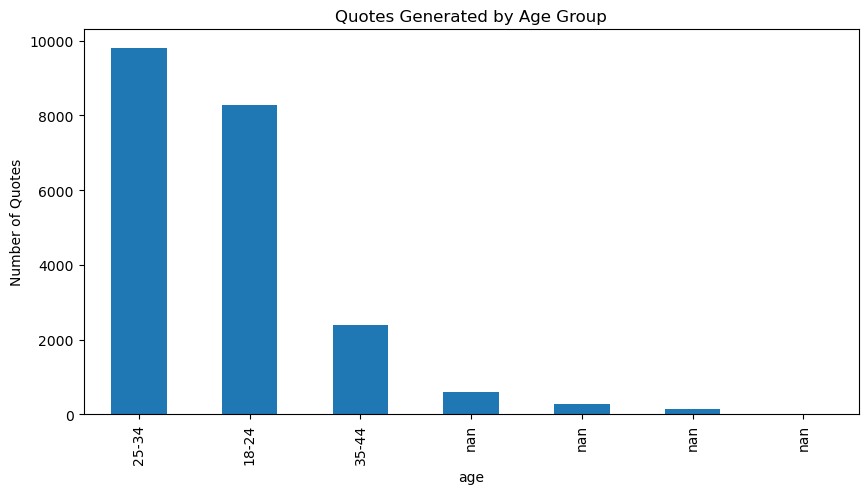

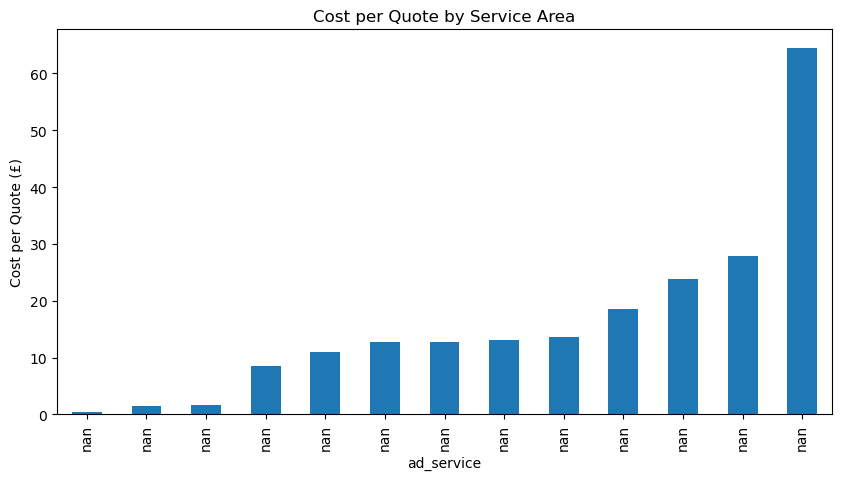

In [49]:
import matplotlib.pyplot as plt

# Visualize age performance
plt.figure(figsize=(10,5))
age_quotes.plot(kind='bar')
plt.title('Quotes Generated by Age Group')
plt.ylabel('Number of Quotes')
plt.show()

# Visualize service efficiency
plt.figure(figsize=(10,5))
service_cost.sort_values().plot(kind='bar')
plt.title('Cost per Quote by Service Area')
plt.ylabel('Cost per Quote (£)')
plt.show()